In [248]:
import pandas as pd

In [249]:
import numpy as np

In [250]:
import matplotlib.pyplot as plt

In [251]:
import seaborn as sns

In [252]:
employee_ids = [f"EMP{str(i).zfill(3)}" for i in range(1, 31)]

In [253]:
np.random.seed(42)

In [254]:
days = pd.date_range(start='2025-06-01', periods=30)

In [255]:
data = []

In [256]:
for emp_id in employee_ids:
    for day in days:
        hours_worked = np.random.uniform(4, 10)
        data.append([emp_id, day, round(hours_worked, 2)])

In [257]:
df = pd.DataFrame(data, columns=["EmployeeID", "Date", "HoursWorked"])

In [258]:
print("Basic Statistics:")

Basic Statistics:


In [259]:
print(df.describe())

                                Date  HoursWorked
count                            900   900.000000
mean   2025-06-15 12:00:00.000000256     6.954233
min              2025-06-01 00:00:00     4.030000
25%              2025-06-08 00:00:00     5.387500
50%              2025-06-15 12:00:00     7.010000
75%              2025-06-23 00:00:00     8.490000
max              2025-06-30 00:00:00    10.000000
std                              NaN     1.762088


In [260]:
employee_summary = df.groupby("EmployeeID")["HoursWorked"].agg(["sum", "mean"]).reset_index()

In [261]:
print("Employee Summary (Total & Average Hours):")
print(employee_summary.head())

Employee Summary (Total & Average Hours):
  EmployeeID     sum      mean
0     EMP001  198.96  6.632000
1     EMP002  209.37  6.979000
2     EMP003  206.79  6.893000
3     EMP004  208.46  6.948667
4     EMP005  202.07  6.735667


In [262]:
anomalies = employee_summary[(employee_summary["mean"] < 5) | (employee_summary["mean"] > 9)]

In [263]:
print("Anomalies Detected (Avg < 5 or > 9):")

Anomalies Detected (Avg < 5 or > 9):


In [264]:
print(anomalies)

Empty DataFrame
Columns: [EmployeeID, sum, mean]
Index: []


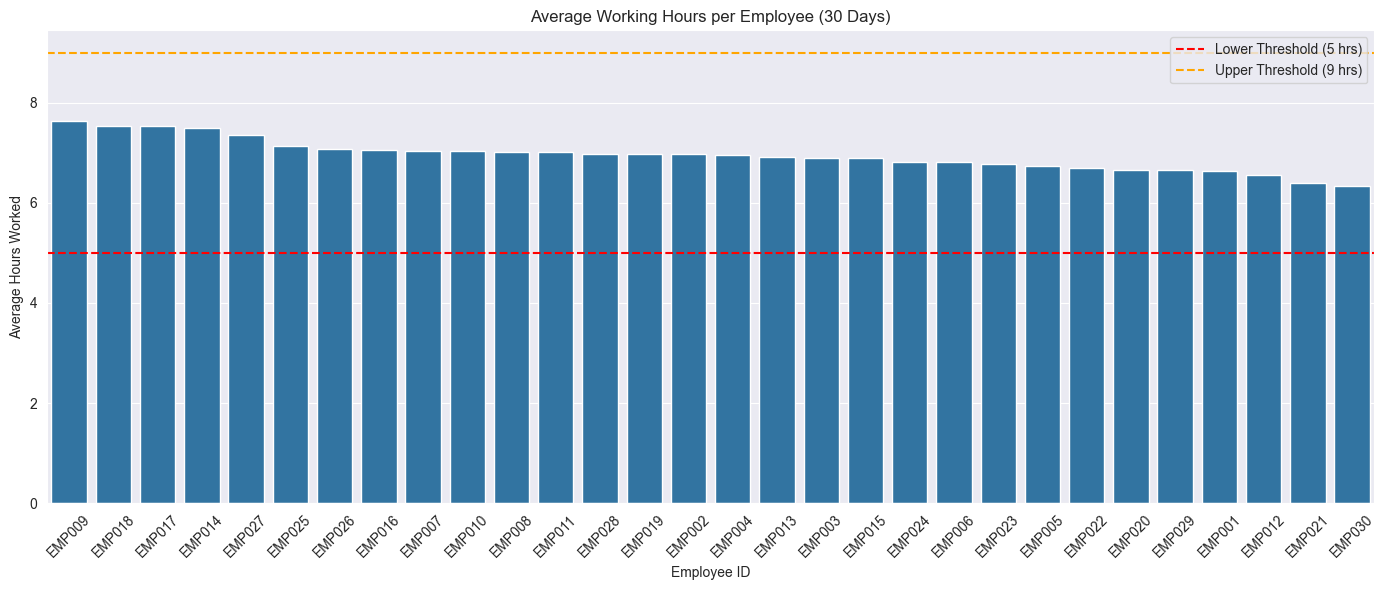

In [265]:
plt.figure(figsize=(14, 6))
sns.barplot(data=employee_summary.sort_values("mean", ascending=False),
            x="EmployeeID", y="mean")
plt.axhline(5, color='red', linestyle='--', label='Lower Threshold (5 hrs)')
plt.axhline(9, color='orange', linestyle='--', label='Upper Threshold (9 hrs)')
plt.title("Average Working Hours per Employee (30 Days)")
plt.xlabel("Employee ID")
plt.ylabel("Average Hours Worked")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()